Ilyes Justin m12001643 <br>
Seidl Stefan m11804717 <br>
Wagermaier Daniel m01605389

# Definition of input files

In [1]:
#These filename need to be defined:
digits_train_filename = '../data/alldigits.csv'

# Your sections ...

# Calc1: Read data

In [2]:
# --------------Has to be run-------------

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.model_selection import GridSearchCV

test_size = 0.3

# import Data
df = pd.read_csv(digits_train_filename)
data = df.to_numpy()
scalar = StandardScaler()

X = data[:, :-1]
y = data[:, -1]

# Splitting (no val_set because of cross-validation in gridSearchCV)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=10)

# Standardizing (mean and SDD only from train_data)
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)


# Explore

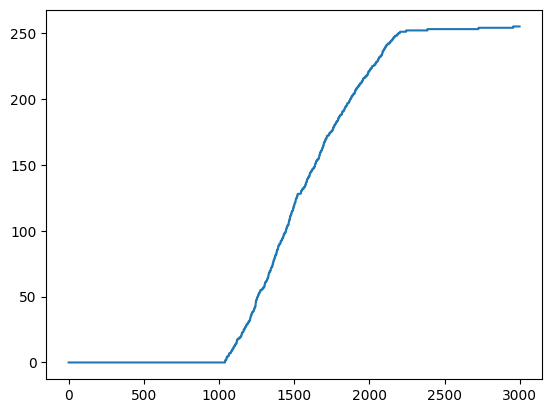

In [13]:
import matplotlib.pyplot as plt

px = digits_train[:,400]
px.sort()
plt.plot(px)

### Support Vector Classification - Hyperparameter Search

In order for us to attain the best possible accuracy for each Support Vector Machine Classifier in sklearn, we would need to implement a method where different variations of hyperparameters would all be tested on the classifiers to deliver the most accurate result. An optimal solution to this problem was by using the GridSearchCV function from sklearn. GridSearchCV does an exhaustive search over all the given parameter values for an estimator, which is then further optimized by a cross-validated grid-search. <br>

Initially, we planned on using all the parameters for each of the classifiers, but shortly noticed that this was going to prove to be quite a challenge. The problem was, if all parameters were used and each parameter had a list of a minimum of 2 elements, the computational time would become exponentially longer. Especially, after further inspection, we saw that many parameters had high computational costs, like for instance break_ties in SVC(), where the documentation states that the classifier takes drastically longer to compute an estimator. Since many more parameters had similar issues we decided to only keep the essential ones in the classifiers. <br>

For SVC() and NuSVC() we used the same parameters, kernel, degree, gamma and coef0, with the exception of C and nu being swapped. All of the kernels were used, asides from precomputed, because the matrix was not squared and the error "Precomputed matrix must be a square matrix. Input is a 4200x784 matrix." was always returned.<br>

In LinearSVC() the parameters were penalty, loss, C and intercept_scaling. The rest were deemed to be unnecessary or too computationally expensive. In LinearSVC() max_iter was ultimately set to 1000, because when it was set lower we constantly recieved "ConvergenceWarning: Liblinear failed to converge, increase the number of iterations." and when it was set higher it would take too long to compute. <br>

After setting the parameters for GridSearchCV, we waited until the best hyperparameters were found. After that, we created an estimator with best_estimator_ , printed the best possible parameters through best_params and finally printed the estimator's score. <br>

NOTICE: We are aware that more precise results are possible, but it would be too computationally expensive and time-consuming to test out all parameters and even more values for C, nu, gamma, coef0, etc. We worked as best we could with the given timeframe to maximize our accuracies and were able to drastically narrow down what the best results were by only using a few parameters per classifier in the GridSearchCV.


In [ ]:
# DO NOT RUN THIS, UNLESS YOU HAVE A LOT OF TIME! TAKES VERY LONG TO COMPUTE!

parametersSVC = dict(C=(0.001,0.01,0.1,1.0,10.0), # Regularization paramter. Strength of regulaization is inversely proportiional to C. Smaller C => more generalization
                     kernel=('linear', 'poly', 'rbf', 'sigmoid'), 
                     degree=(2,3,4), # only relevant to 'poly'
                     gamma=('scale', 'auto', 0.1, 0.01, 0.001, 0.0001), # controls distance of influence of a training point. Low gamma => more points grouped. High gamma => less points grouped; points need to be very close to eachother
                     coef0=(0.0,1.0,0.1,0.01,0.001,0.0001)) # relevent to 'poly' and 'sigmoid'. Independent term in kernel function 

SVM_SVC = GridSearchCV(SVC(), parametersSVC, n_jobs=-1, verbose=5) # n_jobs = -1 means that all processors are used
                                                                   # verbose prints the fold, candidate parameter indexes, and starting time of each computation
SVM_SVC.fit(X_train, y_train)
best_SVC_estimator = SVM_SVC.best_estimator_

print(SVM_SVC.best_params_)
print(best_SVC_estimator.score(X_test, y_test))

print()

parametersLinSVC = dict(penalty=('l1','l2'), # norm used in penalization
                        loss=('hinge','squared_hinge'), # loss function
                        C=(0.001,0.01,0.1,1.0, 10.0), 
                        intercept_scaling=(0.1,1,5,10,15), # larger intercept_scaling => smaller effect of regularization
                        max_iter=[1000]) # max_iter could be set higher, to get rid of warning. Typically, with 10000+ the warning did not come anymore, but takes very long to compute.

SVM_LinSVC = GridSearchCV(LinearSVC(), parametersLinSVC, n_jobs=-1, verbose=5)
SVM_LinSVC.fit(X_train, y_train)
best_LinSVC_estimator = SVM_LinVC.best_estimator_

print(SVM_LinSVC.best_params_)
print(best_LinSVC_estimator.score(X_test, y_test))

print()

parametersNuSVC = dict(nu=(0.01,0.05,0.1,0.5), # upper bound on the fraction of margin errors. Interval (0, 1]
                       kernel=('linear', 'poly', 'rbf', 'sigmoid'), 
                       degree=(2,3,4),
                       gamma=('scale','auto',10.0,1.0,0.1,0.01,0.001,0.0001),
                       coef0=(0.0,1.0,0.1,0.01,0.001,0.0001))

# this GridSearchCV would get stuck sometimes and have to be run again
SVM_NuSVC = GridSearchCV(NuSVC(), parametersNuSVC, n_jobs=-1, verbose=5)
SVM_NuSVC.fit(X_train, y_train)
best_NuSVC_estimator = SVM_NuSVC.best_estimator_

print(SVM_NuSVC.best_params_)
print(best_NuSVC_estimator.score(X_test, y_test))

### Neural Network Classification: Hyperparameter Search

In [ ]:
# hier Code vom Stefan

# Calc2: Support Vector Machine

After running GridSearchCV, we recieved our optimized hyperparameters for each of the SVM Classifiers. We then recreated each of the classifiers with the optimal parameters to return the highest testing and training accuracy attainable.

In [3]:
# THIS CAN BE RUN. ONLY COMPUTES EACH CLASSFIER ONCE WITH MOST OPTIMAL HYPERPARAMETERS

best_SVC = SVC(C = 10, kernel = 'poly', degree = 2, gamma = 'scale', coef0 = 0.1)
best_SVC.fit(X_train, y_train)

print('Support Vector Classifier Testing Accuracy: ' + str(round(best_SVC.score(X_test, y_test) * 100,2)) + '%')
print('Support Vector Classifier Training Accuracy: ' + str(round(best_SVC.score(X_train, y_train) * 100,2)) + '%')

best_LinSVC = LinearSVC(C = 0.001, intercept_scaling = 15, loss = 'squared_hinge', max_iter = 1000, penalty = 'l2')
best_LinSVC.fit(X_train, y_train)

print('Linear Support Vector Classifier Testing Accuracy: ' + str(round(best_LinSVC.score(X_test, y_test) * 100,2)) + '%')
print('Linear Support Vector Classifier Training Accuracy: ' + str(round(best_LinSVC.score(X_train, y_train) * 100,2)) + '%')

best_NuSVC = NuSVC(nu = 0.05, kernel = 'poly', degree = 3, gamma = 0.01, coef0 = 1.0)
best_NuSVC.fit(X_train, y_train)

print('Nu-Support Vector Classifier Testing Accuracy: ' + str(round(best_NuSVC.score(X_test, y_test) * 100,2)) + '%')
print('Nu-Support Vector Classifier Training Accuracy: ' + str(round(best_NuSVC.score(X_train, y_train) * 100,2)) + '%')

Support Vector Classifier Testing Accuracy: 94.83%
Support Vector Classifier Training Accuracy: 99.95%
Linear Support Vector Classifier Testing Accuracy: 89.83%
Linear Support Vector Classifier Training Accuracy: 94.71%
Nu-Support Vector Classifier Testing Accuracy: 95.22%
Nu-Support Vector Classifier Training Accuracy: 99.93%


# Calc3: Neural Network

In [ ]:
# hier Code vom Stefan

# Final classifiers

In [11]:
#These classifiers need to be defined:
digits_SVM = gnb
digits_nn = gnb